In [3]:
from imageAnalysisGrid import *
import csv
import os
import re

In [4]:
# set up folders
#imageDataDir = 'C:\\Users\\tequi\\Documents\\repos\\sudoku_dataset\\images\\'
imageDataDir = 'C:\\Users\\JOSA\\Documents\\imagesRepo\\sudoku_dataset\\images\\'

allImages = []
for file in os.listdir(imageDataDir):
    if file.endswith(".jpg"):
        allImages.append(file)
        
# labelled corners
#labelledCornersDir = 'C:\\Users\\tequi\\Documents\\repos\\sudoku_dataset\\outlines_sorted.csv'
labelledCornersDir = 'C:\\Users\\JOSA\\Documents\\imagesRepo\\sudoku_dataset\\outlines_sorted.csv'

# read in the labels as a dictionary
image = []
p1_x = []
p1_y = []
p2_x = []
p2_y = []
p3_x = []
p3_y = []
p4_x = []
p4_y = []
with open(labelledCornersDir) as csv_file:
    labelledCorners = csv.reader(csv_file)
    line_count = 0
    for row in labelledCorners:
        if line_count > 0:
            tmpPath = row[0]
            tmpPath = re.sub('./images/', '', tmpPath)
            image.append(tmpPath)
            p1_x.append(int(row[1]))
            p1_y.append(int(row[2]))
            p2_x.append(int(row[3]))
            p2_y.append(int(row[4]))
            p3_x.append(int(row[5]))
            p3_y.append(int(row[6]))
            p4_x.append(int(row[7]))
            p4_y.append(int(row[8]))
        line_count = line_count + 1

cornersDict = {
    'image' : image,
    'p1_x' : p1_x,
    'p1_y' : p1_y,
    'p2_x' : p2_x,
    'p2_y' : p2_y,
    'p3_x' : p3_x,
    'p3_y' : p3_y,
    'p4_x' : p4_x,
    'p4_y' : p4_y
}


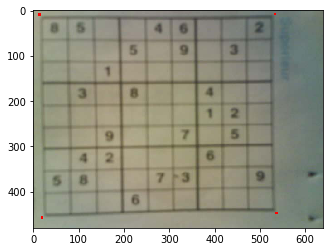

In [5]:
##################
#show 1 image


# check on one img
chosenImg = 4
pxlEnlarg = 3
filename = os.path.join(imageDataDir, cornersDict['image'][chosenImg])
img = io.imread(filename)

img[cornersDict['p1_y'][chosenImg]-pxlEnlarg:cornersDict['p1_y'][chosenImg]+pxlEnlarg,
    cornersDict['p1_x'][chosenImg]-pxlEnlarg:cornersDict['p1_x'][chosenImg]+pxlEnlarg,
   0] = 255
img[cornersDict['p1_y'][chosenImg]-pxlEnlarg:cornersDict['p1_y'][chosenImg]+pxlEnlarg,
    cornersDict['p1_x'][chosenImg]-pxlEnlarg:cornersDict['p1_x'][chosenImg]+pxlEnlarg,
   1] = 0
img[cornersDict['p1_y'][chosenImg]-pxlEnlarg:cornersDict['p1_y'][chosenImg]+pxlEnlarg,
    cornersDict['p1_x'][chosenImg]-pxlEnlarg:cornersDict['p1_x'][chosenImg]+pxlEnlarg,
   2] = 0

img[cornersDict['p2_y'][chosenImg]-pxlEnlarg:cornersDict['p2_y'][chosenImg]+pxlEnlarg,
    cornersDict['p2_x'][chosenImg]-pxlEnlarg:cornersDict['p2_x'][chosenImg]+pxlEnlarg,
   0] = 255
img[cornersDict['p2_y'][chosenImg]-pxlEnlarg:cornersDict['p2_y'][chosenImg]+pxlEnlarg,
    cornersDict['p2_x'][chosenImg]-pxlEnlarg:cornersDict['p2_x'][chosenImg]+pxlEnlarg,
   1] = 0
img[cornersDict['p2_y'][chosenImg]-pxlEnlarg:cornersDict['p2_y'][chosenImg]+pxlEnlarg,
    cornersDict['p2_x'][chosenImg]-pxlEnlarg:cornersDict['p2_x'][chosenImg]+pxlEnlarg,
   2] = 0

img[cornersDict['p3_y'][chosenImg]-pxlEnlarg:cornersDict['p3_y'][chosenImg]+pxlEnlarg,
    cornersDict['p3_x'][chosenImg]-pxlEnlarg:cornersDict['p3_x'][chosenImg]+pxlEnlarg,
   0] = 255
img[cornersDict['p3_y'][chosenImg]-pxlEnlarg:cornersDict['p3_y'][chosenImg]+pxlEnlarg,
    cornersDict['p3_x'][chosenImg]-pxlEnlarg:cornersDict['p3_x'][chosenImg]+pxlEnlarg,
   1] = 0
img[cornersDict['p3_y'][chosenImg]-pxlEnlarg:cornersDict['p3_y'][chosenImg]+pxlEnlarg,
    cornersDict['p3_x'][chosenImg]-pxlEnlarg:cornersDict['p3_x'][chosenImg]+pxlEnlarg,
   2] = 0

img[cornersDict['p4_y'][chosenImg]-pxlEnlarg:cornersDict['p4_y'][chosenImg]+pxlEnlarg,
    cornersDict['p4_x'][chosenImg]-pxlEnlarg:cornersDict['p4_x'][chosenImg]+pxlEnlarg,
   0] = 255
img[cornersDict['p4_y'][chosenImg]-pxlEnlarg:cornersDict['p4_y'][chosenImg]+pxlEnlarg,
    cornersDict['p4_x'][chosenImg]-pxlEnlarg:cornersDict['p4_x'][chosenImg]+pxlEnlarg,
   1] = 0
img[cornersDict['p4_y'][chosenImg]-pxlEnlarg:cornersDict['p4_y'][chosenImg]+pxlEnlarg,
    cornersDict['p4_x'][chosenImg]-pxlEnlarg:cornersDict['p4_x'][chosenImg]+pxlEnlarg,
   2] = 0

plt.imshow(img)
plt.show()

We need to align rows and cols. In the final work we will use on-scrren guidelines to ask the user to align the grid. Here we just assume that images were taken relativley straight

In [ ]:
from skimage.transform import rescale
def getCoords(row1, col1, row2, col2, direction):
    if direction == 'row':
        row1 = int(np.mean([row1, row2]))
        row2 = row1
    if direction == 'col':
        col1 = int(np.mean([col1, col2]))
        col2 = col1
    allRows = list(map(int, np.linspace(row1, row2, 10)))
    allCols = list(map(int, np.linspace(col1, col2, 10)))
    return(allRows, allCols)

def getLineFullImg(row1, col1, row2, col2, direction):
    if direction == 'row':
        rowStart = int(np.mean([row1, row2]))
        rowEnd = rowStart
        colStart = col1
        colEnd = col2
        
    if direction == 'col':
        colStart = int(np.mean([col1, col2]))
        colEnd = colStart
        rowStart = row1
        rowEnd = row2
    
    nPoints = np.amax([np.absolute(rowStart-rowEnd), np.absolute(colStart-colEnd)])
        
    xs = list(map(int, np.linspace(rowStart, rowEnd, nPoints)))
    ys = list(map(int, np.linspace(colStart, colEnd, nPoints)))
    return(xs, ys)

def getBorders(cornersDict, idx):
    allRowsp12, allColsp12 = getCoords(cornersDict['p1_y'][idx], cornersDict['p1_x'][idx],
                                cornersDict['p2_y'][idx], cornersDict['p2_x'][idx], 'row')    

    allRowsp23, allColsp23 = getCoords(cornersDict['p2_y'][idx], cornersDict['p2_x'][idx],
                                cornersDict['p3_y'][idx], cornersDict['p3_x'][idx], 'col')    

    allRowsp43, allColsp43 = getCoords(cornersDict['p4_y'][idx], cornersDict['p4_x'][idx],
                                cornersDict['p3_y'][idx], cornersDict['p3_x'][idx], 'row')    

    allRowsp14, allColsp14 = getCoords(cornersDict['p1_y'][idx], cornersDict['p1_x'][idx],
                                cornersDict['p4_y'][idx], cornersDict['p4_x'][idx], 'col')
    
    return(allRowsp12, allColsp12, allRowsp23, allColsp23, allRowsp43, allColsp43, allRowsp14, allColsp14)

C:\Users\JOSA\Documents\imagesRepo\sudoku_dataset\images\image183.jpg


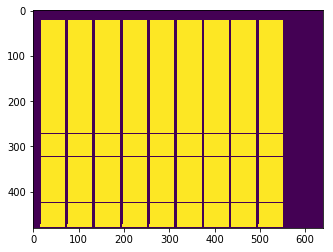

81
Done


In [70]:
thisImgIdx = 12

filename = os.path.join(imageDataDir, cornersDict['image'][thisImgIdx])
img = readImg(filename)
print(filename)


allRowsp12, allColsp12, allRowsp23, allColsp23, allRowsp43, allColsp43, allRowsp14, allColsp14 = getBorders(cornersDict,
                                                                                                            thisImgIdx)

imgGrid = np.zeros((img.shape[0], img.shape[1]))
for i in range(0,10):
    xs, ys = getLineFullImg(allRowsp12[i], allColsp12[i], allRowsp43[i], allColsp43[i], 'col')
    imgGrid[xs, ys] = imgGrid[xs, ys] + 1
    xs, ys = getLineFullImg(allRowsp23[i], allColsp23[i], allRowsp14[i], allColsp14[i], 'row')
    imgGrid[xs, ys] = imgGrid[xs, ys] + 1
squares = np.argwhere(imgGrid==2)

#assuming this difference is representative of the average size of a square
squareSize = int(np.mean([allColsp12[1] - allColsp12[0], allRowsp14[1] - allRowsp14[0]])) 
maxCol = np.amax(allColsp23)
maxRow = np.amax(allRowsp43)
tmpGrid = np.zeros((img.shape[0], img.shape[1]))
iC = 0
for ii in range(0, 100):
    rowStart = squares[ii][0]
    colStart = squares[ii][1]
    rowEnd = rowStart + squareSize
    colEnd = colStart + squareSize
        
    if colEnd <= maxCol+5 and rowEnd <= maxRow+5:
        thisSquare = img[rowStart:rowEnd, colStart:colEnd]
        tmpGrid[rowStart:rowEnd, colStart:colEnd] = 255
        #resize all pics to same size
        desiredSize = 30 
        scaleFactor = desiredSize/thisSquare.shape[0]
        image_rescaled = rescale(thisSquare, scaleFactor, anti_aliasing=True, multichannel = False)
        iC = iC+1
#         plt.imshow(image_rescaled, plt.cm.gray)
#         plt.show()
#         fileName = cornersDict['image'][thisImgIdx] + "_" + str(ii) + ".npy"
#         fileName = os.path.join('npyData', fileName)
#         fileName = fileName.replace('.jpg', '')
#         np.save(fileName, image_rescaled)
tmpGrid[imgGrid > 0] =0
im = Image.fromarray(tmpGrid)
im.save("testingGrid.tiff")
im = Image.fromarray(img)
im.save("original.tiff")
plt.imshow(tmpGrid)
plt.show()
print(iC)
print('Done')



Seems OK. Let's wrap it up to get all squares from all images

In [71]:
for thisImgIdx in range(0, len(cornersDict['image'])):
    
    filename = os.path.join(imageDataDir, cornersDict['image'][thisImgIdx])
    img = readImg(filename)
    allRowsp12, allColsp12, allRowsp23, allColsp23, allRowsp43, allColsp43, allRowsp14, allColsp14 = getBorders(cornersDict,
                                                                                                            thisImgIdx)
    imgGrid = np.zeros((img.shape[0], img.shape[1]))
    for i in range(0,10):
        xs, ys = getLineFullImg(allRowsp12[i], allColsp12[i], allRowsp43[i], allColsp43[i], 'col')
        imgGrid[xs, ys] = imgGrid[xs, ys] + 1
        xs, ys = getLineFullImg(allRowsp23[i], allColsp23[i], allRowsp14[i], allColsp14[i], 'row')
        imgGrid[xs, ys] = imgGrid[xs, ys] + 1
    
    squares = np.argwhere(imgGrid==2)

    #assuming this difference is representative of the average size of a square
    squareSize = int(np.mean([allColsp12[1] - allColsp12[0], allRowsp14[1] - allRowsp14[0]])) 
    maxCol = np.amax(allColsp23)
    maxRow = np.amax(allRowsp43)
    
    imgCount = 0
    for ii in range(0, 100):
        rowStart = squares[ii][0]
        colStart = squares[ii][1]
        rowEnd = rowStart + squareSize
        colEnd = colStart + squareSize
        
        if colEnd <= maxCol+5 and rowEnd <= maxRow+5:
            thisSquare = img[rowStart:rowEnd, colStart:colEnd]
            #resize all pics to same size
            desiredSize = 30 
            scaleFactor = desiredSize/thisSquare.shape[0]
            image_rescaled = rescale(thisSquare, scaleFactor, anti_aliasing=True, multichannel = False)
            fileName = cornersDict['image'][thisImgIdx] + "_" + str(ii) + ".npy"
            fileName = os.path.join('npyData', fileName)
            fileName = fileName.replace('.jpg', '')
            np.save(fileName, image_rescaled)
            imgCount = imgCount+1
    
    if not imgCount == 81:
        print(thisImgIdx)
        
            
print('Done')

Done
